<h4>
<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">OBJECTIVE:</span></strong></li>
</ul>
<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Use the text data to build simple feed-forward Neural Nets and benchmark against the base ML models.</span></p>
    </h4>

In [1]:
# imports

import os
import math
import random
import warnings
from time import time
from pathlib import Path
import pandas as pd, numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict, Counter
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS
import tensorflow

tqdm.pandas()
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

C:\Users\surya\anaconda3\envs\full\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
# reproducibility
seed = 7
random.seed(seed)
tensorflow.random.set_seed(seed)

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Import & Analyse the data.</span></strong></li>
</ul></h3>

In [3]:
dataset = pd.read_excel('./data/cleaned_data.xlsx')
dataset.sample(10)

,short_description,description,caller,group,char_length,word_length,short_char_length,short_word_length,description_keywords,short_description_keywords,group_code,char_length_bins,cleaned_description,cleaned_short_description,cleaned_char_length,cleaned_word_length,cleaned_short_char_length,cleaned_short_word_length
6352,instalação guardião (banco hsbc),"gentileza, instalar o guardião do banco hsbc p...",btxfwisc mapbkflt,GRP_62,89,13,32,4,utilização de transações pela internet,instalação guardião,59,11,gentileza instalar guardiao banco hsbc para ut...,instalacao guardiao banco hsbc,82,11,30,4
8076,unable to map a printer,unable to map a printer,vfrdxtqw jfbmsenz,GRP_0,23,5,23,5,unable to map a printer,unable to map a printer,0,1,unable map printer,unable map printer,18,3,18,3
2468,unable to enter an estimated value in opportun...,unable to enter an estimated value in opportun...,wanyrjkg tsycmeof,GRP_22,61,11,61,11,unable to enter an estimated,unable to enter an estimated,15,7,unable enter estimated value opportunities ms crm,unable enter estimated value opportunities ms crm,49,7,49,7
382,engineering_tool upload issue,"from: ufgkybsh ijswtdve \nsent: tuesday, octob...",ufgkybsh ijswtdve,GRP_25,272,39,29,3,tool upload issue dear sir,tool upload issue,18,28,sent tuesday 8 29 pm nwfodmhc exurcwkm subject...,engineering tool upload issue,156,24,29,4
670,job bkbackup_tool_o365_primary_prod_full faile...,received from: monitoring_tool@company.com\n\n...,bpctwhsn kzqsbmtp,GRP_5,132,11,90,8,full failed in job,full failed in job,45,15,job bkbackup tool o365 primary prod full faile...,job bkbackup tool o365 primary prod full faile...,70,13,70,13
7304,unable to access ess,unable to access ess,nuqwmejc tosypckj,GRP_0,20,4,20,4,unable to access ess,unable to access ess,0,1,unable access ess,unable access ess,17,3,17,3
4171,application response time (other network resou...,our colleagues have opened a ticket about the ...,gwfozprc kldrsnze,GRP_0,150,25,65,8,sales org,application response time,0,17,colleagues opened ticket issue spain sales org...,application response time network resources wo...,93,14,57,7
5944,erp SID_34 password reset,erp SID_34 password reset,mzqgobhv pebimhfz,GRP_0,25,4,25,4,erp SID,erp SID,0,2,erp sid 34 password reset,erp sid 34 password reset,25,5,25,5
5561,analysis for microsoft excel access (erp busin...,\n\nreceived from: zolnubvq.ehrqifxp@gmail.com...,zolnubvq ehrqifxp,GRP_0,225,28,63,8,oblghuyf and kvwrbfet jrhoqdix computer,analysis for microsoft excel access,0,24,install analysis microsoft excel kvwrbfet jrho...,analysis microsoft excel access erp business i...,107,14,57,7
3351,urgent help required- outlook to crm mfg_toolt...,urgent help required- outlook to crm mfg_toolt...,kvqtzayg ehjrviak,GRP_0,83,14,57,8,urgent help required,outlook to crm mfg,0,10,urgent help required outlook crm mfg tooltion ...,urgent help required outlook crm mfg tooltion ...,72,12,51,8


In [4]:
dataset.isna().sum()

short_description              0
description                    0
caller                         0
group                          0
char_length                    0
word_length                    0
short_char_length              0
short_word_length              0
description_keywords           7
short_description_keywords    38
group_code                     0
char_length_bins               0
cleaned_description            0
cleaned_short_description      0
cleaned_char_length            0
cleaned_word_length            0
cleaned_short_char_length      0
cleaned_short_word_length      0
dtype: int64

In [5]:
dataset[dataset.isna().any(axis=1)].to_csv('./data/missing_keywords.csv')
dataset[dataset.isna().any(axis=1)]  # check rows with missing values

,short_description,description,caller,group,char_length,word_length,short_char_length,short_word_length,description_keywords,short_description_keywords,group_code,char_length_bins,cleaned_description,cleaned_short_description,cleaned_char_length,cleaned_word_length,cleaned_short_char_length,cleaned_short_word_length
483,: k-bngell-cgdaytshqsd <k-bngell-cgdaytshqsd@c...,\n\nreceived from: lvxakohq.tsfnhowj@gmail.com...,lvxakohq tsfnhowj,GRP_19,210,33,69,3,rao left company. with kind,NaN,11,22,pl add name ts team also need administrative c...,k bngell cgdaytshqsd,110,19,20,3
708,id 04637,id 04637 printer have paper stuck up issue.,ongumpdz pjkrfmbc,GRP_19,43,8,8,2,printer have paper stuck,NaN,11,5,04637 printer paper stuck issue,04637,31,5,5,1
755,pc name,\n\nreceived from: koahsriq.wdugqatr@gmail.com...,koahsriq wdugqatr,GRP_28,323,37,7,2,service tag,NaN,21,33,need new pc name service tag pc fy80nkssc2 u04...,pc name,220,36,7,2
1114,id : 1064870825,id : 2175981936\n\nperson on other side discon...,efbwiadp dicafxhv,GRP_0,51,8,15,3,person on other side disconnected,NaN,0,6,2175981936 person side disconnected,1064870825,35,4,10,1
1294,"dn 9169508476,t/o 642392",\n\nreceived from: gjtyswkb.dpvaymxr@gmail.com...,gjtyswkb dpvaymxr,GRP_6,129,19,24,3,received,NaN,56,15,dear chk dn 9169508476 help check urgent,dn 9169508476 642392,40,7,20,3
1331,"apac, company: multiple switches went down at ...",company-ap-chn-apac-company-fpsf-2960s-access-...,mnlazfsr mtqrkhnx,GRP_8,150,3,68,12,NaN,apac,72,17,company ap chn apac company fpsf 2960s access ...,apac company multiple switches went 07 36 pm et,150,27,47,9
1641,need help,\n\nreceived from: axcbfuqo.yiagubvh@gmail.com...,axcbfuqo yiagubvh,GRP_0,376,65,9,2,good morning,NaN,0,35,trouble password changed password possibility ...,need help,194,26,9,2
1823,bgflmyar.xgufkidq@gmail.com wanted to check if...,bgflmyar.xgufkidq@gmail.com wanted to check if...,olckhmvx pcqobjnd,GRP_0,83,13,83,13,tool on his phone,NaN,0,10,wanted check login hr tool phone,wanted check login hr tool phone,32,6,32,6
2396,need your help!!,\n\nreceived from: ezwcpqrh.bnwqaglk@gmail.com...,ezwcpqrh bnwqaglk,GRP_0,571,93,17,3,emal thru the web mail,NaN,0,44,desk sent ts emal thru web mail open ms office...,need help,308,49,9,2
2436,changes in ad,"hi, there,\nmy reporting line in the outlook o...",ywbnzxud qzwrynux,GRP_2,246,44,13,3,outlook organization system is wrong,NaN,12,25,reporting line outlook organization system wro...,changes ad,144,20,10,2


In [6]:
le = LabelEncoder()
dataset['group_code'] = le.fit_transform(dataset.group)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8432 entries, 0 to 8431
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   short_description           8432 non-null   object
 1   description                 8432 non-null   object
 2   caller                      8432 non-null   object
 3   group                       8432 non-null   object
 4   char_length                 8432 non-null   int64 
 5   word_length                 8432 non-null   int64 
 6   short_char_length           8432 non-null   int64 
 7   short_word_length           8432 non-null   int64 
 8   description_keywords        8425 non-null   object
 9   short_description_keywords  8394 non-null   object
 10  group_code                  8432 non-null   int32 
 11  char_length_bins            8432 non-null   int64 
 12  cleaned_description         8432 non-null   object
 13  cleaned_short_description   8432 non-null   obje

In [7]:
le.classes_

array(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30',
       'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36',
       'GRP_37', 'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41',
       'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47',
       'GRP_48', 'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52',
       'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58',
       'GRP_59', 'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63',
       'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69',
       'GRP_7', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73', 'GRP_8', 'GRP_9'],
      dtype=object)

In [8]:
X = np.array(dataset.cleaned_description)
y = np.array(dataset.group_code)
X.shape, y.shape

((8432,), (8432,))

In [9]:
from keras.utils import np_utils
y_dummy_coded = np_utils.to_categorical(y)
y[0], y_dummy_coded[0]

(0,
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy_coded, test_size=.2, random_state=seed)  # splits are stratified by y

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6745,), (1687,), (6745, 74), (1687, 74))

In [12]:
X_train[0], y_train[0]  # check sample

('1 sales organisation address 1278 phone number fax number need reversed original phone fax number furth 0911 2 plant address plant 124 phone fax numbers need adjusted show germany central phone numbers fax 3 company code address 5278 need reverted back address furth germany details attached ticket',
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32))

In [13]:
# TODO: Check the distributions of groups in training and testing sets, i.e, if they vary too much
# stratify by y if required during splits
# or data augmentation to upsample minority classes to balance the group distributions

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Tokenize and pad sequences</span></strong></li>
</ul></h3>

In [14]:
# define params
NUM_WORDS = 20000
EMBEDDING_DIM = 300
MAX_LEN = 100 # dataset['word_length'].max()
MAX_LEN

100

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(X_train)
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)
X_train_tokens[0], X_test_tokens[0]

([11,
  85,
  6543,
  136,
  1916,
  42,
  126,
  1598,
  126,
  31,
  4289,
  729,
  42,
  1598,
  126,
  1005,
  6544,
  25,
  67,
  136,
  67,
  2397,
  42,
  1598,
  748,
  31,
  3360,
  326,
  181,
  3361,
  42,
  748,
  1598,
  47,
  10,
  186,
  136,
  6545,
  31,
  6546,
  151,
  136,
  1005,
  181,
  131,
  88,
  16],
 [743, 17, 2106, 1160, 1543, 2106, 951, 296])

In [16]:
y_train[0], y_test[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32))

In [17]:
# pad sequences to cut longer texts to a uniform length and pad the sentences that are shorter than that with <PAD> token

# using just 20 words from each headline will severely limit the information that is 
# available to the model and affect performance although the training will be faster
X_train_padded = pad_sequences(X_train_tokens,
                               padding='post',
                               truncating='post',
                               maxlen=MAX_LEN)
X_test_padded = pad_sequences(X_test_tokens,
                              padding='post',
                              truncating='post',
                              maxlen=MAX_LEN)


print(f'X train:  {X_train_padded.shape}\nX test:   {X_test_padded.shape}')

X train:  (6745, 100)
X test:   (1687, 100)


In [18]:
pprint(X_train_padded[0], compact=True)

array([  11,   85, 6543,  136, 1916,   42,  126, 1598,  126,   31, 4289,
        729,   42, 1598,  126, 1005, 6544,   25,   67,  136,   67, 2397,
         42, 1598,  748,   31, 3360,  326,  181, 3361,   42,  748, 1598,
         47,   10,  186,  136, 6545,   31, 6546,  151,  136, 1005,  181,
        131,   88,   16,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])


In [19]:
WORD_TO_INDEX = tokenizer.word_index
# pprint(WORD_TO_INDEX, compact=True)
pprint(list(WORD_TO_INDEX.keys())[:100], compact=True)

['job', 'yes', 'na', 'ts', 'password', 'erp', 'user', 'tool', '00', 'company',
 '1', 'scheduler', 'reset', 'sid', 'failed', 'ticket', 'issue', 'unable',
 'access', 'error', 'account', 'site', 'help', 'power', '2', 'system',
 'circuit', 'email', 'working', 'hostname', 'need', 'login', 'vendor',
 'outlook', 'network', 'name', 'backup', 'telecom', '34', 'message', '10',
 'phone', 'type', 'see', 'able', 'new', '3', 'team', 'server', 'windows',
 'contact', 'update', 'check', '4', 'locked', 'get', '5', 'engineering',
 'printer', 'maintenance', 't', 'log', 'outage', 'usa', 'scheduled', 'crm',
 'plant', 'vpn', 'skype', 'provider', 'cert', 'notified', '11', '23', 'maint',
 '8', '12', 'time', 'pc', 'request', 'problem', 'using', 'mit', 'change',
 'sales', 'open', 'order', 'attached', '9', 'could', '6', 'device', 'call', '7',
 'data', 'management', 'connect', 'start', '13', 'following']


In [20]:
VOCAB_SIZE = len(WORD_TO_INDEX) + 1
VOCAB_SIZE

13989

In [21]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
def retrieve_description_feat(x, mapping=WORD_TO_INDEX) -> str:
    # increment 3 
    mapping = {k:(v + 3) for k, v in mapping.items()}
    mapping['<PAD>'] = 0
    mapping['<START>'] = 1
    mapping['<UNK>'] = 2
    inv_mapping = {v: k for k, v in mapping.items()}
    return str(" ".join(inv_mapping.get(i, '<NA>') for i in x))

retrieve_description_feat(X_test_padded[7])

'failed support crm apac noise amount <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">GloVe Embeddings</span></strong></li>
</ul></h3>

In [22]:
EMBEDDING_DIM

300

In [23]:
def get_embedding_matrix(embedding_dim=EMBEDDING_DIM):
    embeddings = defaultdict()
    if embedding_dim == 200:
        file_path = f'./data/glove.6B.{embedding_dim}d.txt'
    elif embedding_dim == 300:
        file_path = f'./data/glove.840B.{embedding_dim}d.txt'
    for l in open(file_path, encoding='utf-8'):
        word = l.split(" ")[0]
        embeddings[word] = np.asarray(l.split(" ")[1:], dtype='float32')

    embeddings = dict(embeddings)

    # create a weight matrix for words in training docs
    embedding_matrix = np.zeros((NUM_WORDS, embedding_dim))

    for word, idx in WORD_TO_INDEX.items():
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [24]:
# use pre-trained glove embedding matrix to initialize weights in our model
# embedding_matrix = get_embedding_matrix()
# embedding_matrix.shape

(20000, 300)

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Simple Feed-Forward Neural Net</span></strong></li>
</ul></h4>

In [59]:
# !pip install livelossplot
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm, unit_norm
from tensorflow.python.keras.callbacks import LambdaCallback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization, Dropout, Embedding, LSTM, MaxPooling1D, Conv1D

In [60]:
NUM_CLASSES = len(le.classes_)
VOCAB_SIZE, MAX_LEN, EMBEDDING_DIM, NUM_CLASSES

(13989, 100, 300, 74)

In [61]:
# define model

model1 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(1024, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [62]:
# Define Callbacks and a few helper functions

# simplify the training log
simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(f" ~| Epoch: {e+1} | Validation Loss: {l['val_loss']:.5f}", end =" >|> \n" ))

# early stopping
early_stop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=7,
                              verbose=0, 
                              restore_best_weights=True)

# learning rate reduction
lr_reduce_on_plateau = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.4,
                                            min_lr=0.00001)

def plot_learning_curve(hist):
    sns.set()
    plt.figure(figsize=(5,5))
    train = hist.history['loss']
    val = hist.history['val_loss']
    epochs_run = range(1,len(train) + 1)
    sns.lineplot(epochs_run, train, marker = 'o', color = 'coral', label = 'Training Loss')
    sns.lineplot(epochs_run, val,  marker = '>', color = 'green', label = 'Validation Loss')
    plt.title("Loss vs. Epochs", fontsize = 20)
    plt.legend()
    plt.show()

In [63]:
# !pip install nvidia-smi
!nvidia-smi

Thu Sep  9 21:49:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.68       Driver Version: 471.68       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   69C    P2    45W /  N/A |    764MiB /  8192MiB |     10%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [64]:
import gc
gc.collect()

18882

In [65]:
X_train[0]

'1 sales organisation address 1278 phone number fax number need reversed original phone fax number furth 0911 2 plant address plant 124 phone fax numbers need adjusted show germany central phone numbers fax 3 company code address 5278 need reverted back address furth germany details attached ticket'

In [66]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6745,), (6745, 74), (1687,), (1687, 74))

In [67]:
EPOCHS = 200
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h1 = model1.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("\nTraining on CPU:")
    h1 = model1.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 1.94133 >|> 
 ~| Epoch: 2 | Validation Loss: 1.91267 >|> 
 ~| Epoch: 3 | Validation Loss: 1.94216 >|> 
 ~| Epoch: 4 | Validation Loss: 2.34954 >|> 
 ~| Epoch: 5 | Validation Loss: 2.38801 >|> 
 ~| Epoch: 6 | Validation Loss: 2.70142 >|> 

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 7 | Validation Loss: 3.17924 >|> 
 ~| Epoch: 8 | Validation Loss: 3.00822 >|> 
 ~| Epoch: 9 | Validation Loss: 3.22107 >|> 

Training Done.


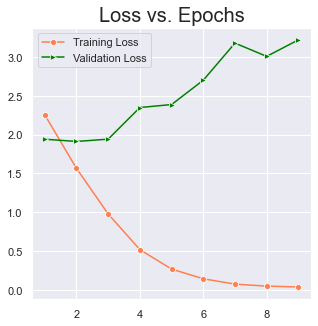

In [68]:
plot_learning_curve(h1)

In [69]:
loss, acc = model1.evaluate(X_test_padded, y_test)
print("Testing Loss: ", loss*100)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 2s 32ms/step - loss: 1.9868 - accuracy: 0.5904
Testing Loss:  198.6793875694275
Testing Accuracy:  59.03971791267395


<h4><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>This model is clearly overfitting, we will add regularization to the next iteration
 </span></ul></h4>

In [70]:
# define model

model2 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [71]:
EPOCHS = 200
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h2 = model2.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h2 = model2.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.94382 >|> 
 ~| Epoch: 2 | Validation Loss: 2.45153 >|> 
 ~| Epoch: 3 | Validation Loss: 3.38288 >|> 
 ~| Epoch: 4 | Validation Loss: 3.27032 >|> 
 ~| Epoch: 5 | Validation Loss: 1.90582 >|> 
 ~| Epoch: 6 | Validation Loss: 2.78300 >|> 
 ~| Epoch: 7 | Validation Loss: 1.99125 >|> 
 ~| Epoch: 8 | Validation Loss: 2.07481 >|> 
 ~| Epoch: 9 | Validation Loss: 2.38965 >|> 

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 10 | Validation Loss: 2.34902 >|> 
 ~| Epoch: 11 | Validation Loss: 2.00835 >|> 
 ~| Epoch: 12 | Validation Loss: 2.13303 >|> 

Training Done.


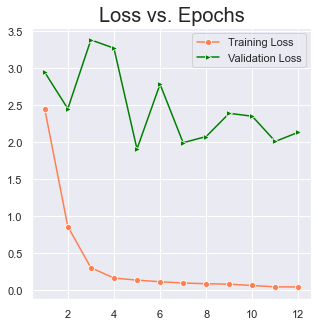

In [72]:
plot_learning_curve(h2)

In [73]:
loss, acc = model2.evaluate(X_test_padded, y_test)
print("Testing Loss: ", loss*100)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 1s 10ms/step - loss: 1.8670 - accuracy: 0.6242
Testing Loss:  186.69580221176147
Testing Accuracy:  62.41849660873413


In [74]:
# define model

model3 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(20, activation = 'relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [75]:
EPOCHS = 200
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h3 = model3.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h3 = model3.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.22122 >|> 
 ~| Epoch: 2 | Validation Loss: 2.01724 >|> 
 ~| Epoch: 3 | Validation Loss: 1.86620 >|> 
 ~| Epoch: 4 | Validation Loss: 1.80491 >|> 
 ~| Epoch: 5 | Validation Loss: 1.81817 >|> 
 ~| Epoch: 6 | Validation Loss: 1.85564 >|> 
 ~| Epoch: 7 | Validation Loss: 1.83362 >|> 
 ~| Epoch: 8 | Validation Loss: 1.92411 >|> 

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 9 | Validation Loss: 1.94536 >|> 
 ~| Epoch: 10 | Validation Loss: 2.01019 >|> 
 ~| Epoch: 11 | Validation Loss: 2.07252 >|> 

Training Done.


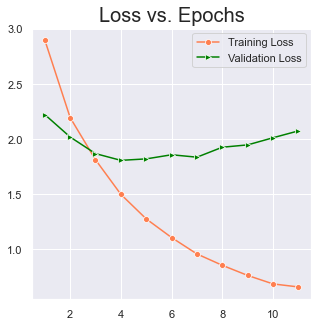

In [76]:
plot_learning_curve(h3)

In [77]:
loss, acc = model3.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 3ms/step - loss: 1.8728 - accuracy: 0.6017
Testing Accuracy:  60.165977478027344


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">LSTM</span></strong></li>
</ul></h4>

In [78]:
# define model

model4 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    LSTM(128),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [79]:
EPOCHS = 50
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h4 = model4.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h4 = model4.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.46808 >|> 
 ~| Epoch: 2 | Validation Loss: 2.46217 >|> 
 ~| Epoch: 3 | Validation Loss: 2.46726 >|> 
 ~| Epoch: 4 | Validation Loss: 2.45960 >|> 
 ~| Epoch: 5 | Validation Loss: 2.45422 >|> 
 ~| Epoch: 6 | Validation Loss: 2.45911 >|> 
 ~| Epoch: 7 | Validation Loss: 2.45447 >|> 
 ~| Epoch: 8 | Validation Loss: 2.45572 >|> 
 ~| Epoch: 9 | Validation Loss: 2.43528 >|> 
 ~| Epoch: 10 | Validation Loss: 2.33583 >|> 
 ~| Epoch: 11 | Validation Loss: 2.18862 >|> 
 ~| Epoch: 12 | Validation Loss: 2.22233 >|> 
 ~| Epoch: 13 | Validation Loss: 2.22452 >|> 
 ~| Epoch: 14 | Validation Loss: 2.28555 >|> 
 ~| Epoch: 15 | Validation Loss: 2.14672 >|> 
 ~| Epoch: 16 | Validation Loss: 2.31278 >|> 
 ~| Epoch: 17 | Validation Loss: 2.15449 >|> 
 ~| Epoch: 18 | Validation Loss: 2.23630 >|> 
 ~| Epoch: 19 | Validation Loss: 2.22253 >|> 

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 20 | Validation Loss: 2.27

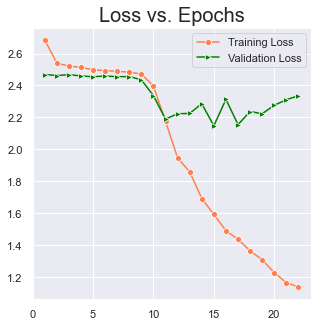

In [80]:
plot_learning_curve(h4)

In [81]:
loss, acc = model4.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 2s 45ms/step - loss: 2.1057 - accuracy: 0.5145
Testing Accuracy:  51.452285051345825


In [82]:
model5 = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=256, input_length=MAX_LEN),
    Dropout(0.25),
    Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1),
    Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1),
    MaxPooling1D(pool_size = 2),
    Conv1D(64, 5, padding = 'same', activation = 'relu', strides = 1),
    MaxPooling1D(pool_size = 2),
    LSTM(75),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model5.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [83]:
EPOCHS = 20
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h5 = model5.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h5 = model5.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.28769 >|> 
 ~| Epoch: 2 | Validation Loss: 2.16157 >|> 
 ~| Epoch: 3 | Validation Loss: 2.08935 >|> 
 ~| Epoch: 4 | Validation Loss: 2.07187 >|> 
 ~| Epoch: 5 | Validation Loss: 1.99478 >|> 
 ~| Epoch: 6 | Validation Loss: 2.07799 >|> 
 ~| Epoch: 7 | Validation Loss: 2.10108 >|> 
 ~| Epoch: 8 | Validation Loss: 2.15820 >|> 
 ~| Epoch: 9 | Validation Loss: 2.18132 >|> 

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 10 | Validation Loss: 2.18530 >|> 
 ~| Epoch: 11 | Validation Loss: 2.25311 >|> 
 ~| Epoch: 12 | Validation Loss: 2.27791 >|> 

Training Done.


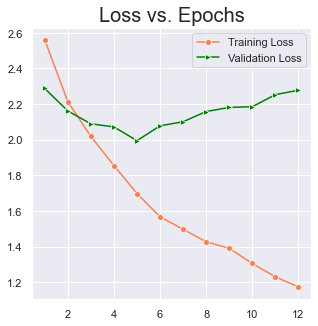

In [84]:
plot_learning_curve(h5)

In [85]:
loss, acc = model5.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 2s 40ms/step - loss: 2.0140 - accuracy: 0.5436
Testing Accuracy:  54.356849193573


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Use TfIdf vectors instead of Embedding Layer + Feature Selection</span></strong></li>
</ul></h4>

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# using 75-25 split instead of 50-50 split as we need more data to train neural nets
X_train_vec, X_test_vec, y_train_vec, y_test_vec = train_test_split(X, y, test_size=0.2, random_state=seed)
print(f"Train dataset shape: {X_train_vec.shape}, \nTest dataset shape: {X_test_vec.shape}")

Train dataset shape: (6745,), 
Test dataset shape: (1687,)


In [53]:
NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2


kwargs = {
    'ngram_range' : NGRAM_RANGE,
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : TOKEN_MODE,
    'min_df' : MIN_DOC_FREQ
}
vectorizer = TfidfVectorizer(**kwargs)
X_train_vec = vectorizer.fit_transform(X_train_vec)
X_test_vec = vectorizer.transform(X_test_vec)
print(f"Train dataset shape: {X_train_vec.shape}, \nTest dataset shape: {X_test_vec.shape}")

Train dataset shape: (6745, 15514), 
Test dataset shape: (1687, 15514)


In [54]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select best k features, with feature importance measured by f_classif
# Set k as 20000 or (if number of ngrams is less) number of ngrams   
selector = SelectKBest(f_classif, k=min(TOP_K, X_train_vec.shape[1]))
selector.fit(X_train_vec, y_train_vec)
X_train_vec = selector.transform(X_train_vec).astype('float32')
X_test_vec = selector.transform(X_test_vec).astype('float32')
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

print(f"Train dataset shape: {X_train.shape}, \nTest dataset shape: {X_test.shape}")

Train dataset shape: (6745,), 
Test dataset shape: (1687,)


In [55]:
model6 = Sequential([   
    Dense(64, activation='relu', input_shape=X_train_vec.shape[1:]),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(NUM_CLASSES, activation='softmax')
])

model6.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [56]:
EPOCHS = 20
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h6 = model6.fit(
            X_train_vec, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop],
            verbose = False)
except Exception:
    print("Training on CPU:")
    h6 = model6.fit(
            X_train_vec, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.22111 >|> 
 ~| Epoch: 2 | Validation Loss: 1.96383 >|> 
 ~| Epoch: 3 | Validation Loss: 1.87203 >|> 
 ~| Epoch: 4 | Validation Loss: 1.79347 >|> 
 ~| Epoch: 5 | Validation Loss: 1.74161 >|> 
 ~| Epoch: 6 | Validation Loss: 1.71394 >|> 
 ~| Epoch: 7 | Validation Loss: 1.70091 >|> 
 ~| Epoch: 8 | Validation Loss: 1.71874 >|> 
 ~| Epoch: 9 | Validation Loss: 1.75847 >|> 
 ~| Epoch: 10 | Validation Loss: 1.77131 >|> 
 ~| Epoch: 11 | Validation Loss: 1.82004 >|> 
 ~| Epoch: 12 | Validation Loss: 1.88941 >|> 
 ~| Epoch: 13 | Validation Loss: 1.88831 >|> 
 ~| Epoch: 14 | Validation Loss: 1.95550 >|> 

Training Done.


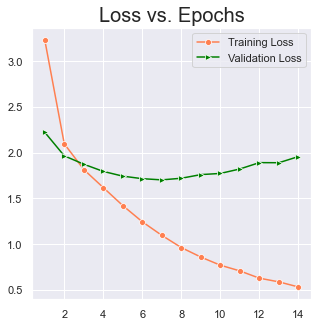

In [57]:
plot_learning_curve(h6)

In [58]:
loss, acc = model6.evaluate(X_test_vec, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 3ms/step - loss: 1.7175 - accuracy: 0.6432
Testing Accuracy:  64.31535482406616


<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Metrics: </span></strong></li>
</ul></h3>

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td>Simple Feed-Forward Net using Embedding Layer</td>
    <td></td>
  </tr>
<tr>
    <td>Feed-Forward + Batch Norm</td>
    <td></td>
  </tr>
<tr>
    <td>Feed-Forward + Dropout</td>
    <td></td>
  </tr>
  <tr>
    <td>LSTM</td>
    <td></td>
  </tr>
<tr>
    <td>Convolution Blocks (Dimensionality Reduction) + LSTM</td>
    <td></td>
  </tr>
<tr>
    <td>TfIdf Vectors + Better train-test split + Feature Selection + Feed-forward Neural Net</td>
    <td>64.32</td>
  </tr>
</table>

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"></span></strong></li>
</ul></h4>